In [3]:
#from google.colab import drive
#drive.mount('/content/drive')
# this for loading the datasets from the drive directly

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [10]:
data = pd.read_csv('content/data.csv',sep=',')

In [ ]:
data.head(10)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
datas= data[['LotFrontage','LotArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','SalePrice']]
datas

,LotFrontage,LotArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,SalePrice
0,65.0,8450,1,0,2,1,3,208500
1,80.0,9600,0,1,2,0,3,181500
2,68.0,11250,1,0,2,1,3,223500
3,60.0,9550,1,0,1,0,3,140000
4,84.0,14260,1,0,2,1,4,250000
...,...,...,...,...,...,...,...,...
1455,62.0,7917,0,0,2,1,3,175000
1456,85.0,13175,1,0,2,0,3,210000
1457,66.0,9042,0,0,2,0,4,266500
1458,68.0,9717,1,0,1,0,2,142125


In [13]:
datas.describe()

,LotFrontage,LotArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,0.425342,0.057534,1.565068,0.382877,2.866438,180921.195890
std,24.284752,9981.264932,0.518911,0.238753,0.550916,0.502885,0.815778,79442.502883
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,59.000000,7553.500000,0.000000,0.000000,1.000000,0.000000,2.000000,129975.000000
50%,69.000000,9478.500000,0.000000,0.000000,2.000000,0.000000,3.000000,163000.000000
75%,80.000000,11601.500000,1.000000,0.000000,2.000000,1.000000,3.000000,214000.000000
max,313.000000,215245.000000,3.000000,2.000000,3.000000,2.000000,8.000000,755000.000000


In [14]:
datas.isnull().sum()

LotFrontage     259
LotArea           0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
SalePrice         0
dtype: int64

In [15]:
(datas['SalePrice']==0).sum()

0

In [16]:
datas['bathroom']=datas['BsmtFullBath']+datas['BsmtHalfBath']+datas['FullBath']+datas['HalfBath']


<ipython-input-16-6f83856b4304>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas['bathroom']=datas['BsmtFullBath']+datas['BsmtHalfBath']+datas['FullBath']+datas['HalfBath']


In [17]:
datas



,LotFrontage,LotArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,SalePrice,bathroom
0,65.0,8450,1,0,2,1,3,208500,4
1,80.0,9600,0,1,2,0,3,181500,3
2,68.0,11250,1,0,2,1,3,223500,4
3,60.0,9550,1,0,1,0,3,140000,2
4,84.0,14260,1,0,2,1,4,250000,4
...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0,0,2,1,3,175000,3
1456,85.0,13175,1,0,2,0,3,210000,3
1457,66.0,9042,0,0,2,0,4,266500,2
1458,68.0,9717,1,0,1,0,2,142125,2


In [18]:
data= datas[['LotArea','bathroom','BedroomAbvGr','SalePrice']]

In [19]:
data


,LotArea,bathroom,BedroomAbvGr,SalePrice
0,8450,4,3,208500
1,9600,3,3,181500
2,11250,4,3,223500
3,9550,2,3,140000
4,14260,4,4,250000
...,...,...,...,...
1455,7917,3,3,175000
1456,13175,3,3,210000
1457,9042,2,4,266500
1458,9717,2,2,142125


In [20]:
# visualizing the data according to price
import seaborn as sns

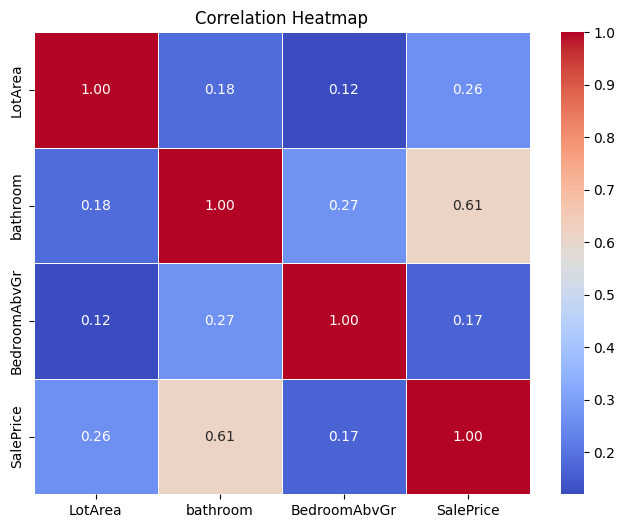

In [21]:

plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [24]:
# for spliting the data into predictors  and target
X= data.drop('SalePrice', axis= 1)
y= data['SalePrice']

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [29]:
#sliting the data into train and test
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2,random_state= 42)

In [31]:
linear_reg_model= LinearRegression()
# fit the model
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [36]:
# for taking the inputs form the user
footage= float(input('enter the square area footage of the house:'))
bathrooms= float(input('enter the no. of bathrooms in the house:'))
rooms= float(input('enter the no.of rooma in the house:'))
# creating the data frame for the inputs
input_data= pd.DataFrame([[footage, bathrooms, rooms]], columns= X_train.columns)

# predicting the price of the house
predicted_price= linear_reg_model.predict(input_data)

enter the square area footage of the house:200
enter the no. of bathrooms in the house:3
enter the no.of rooma in the house:5


In [38]:
# The price of the house is
predicted_price

array([194109.28411466])